In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Figure 6.1.a - Pg 62 top left

Notes: 
- Shade and eta are undefined
- using Shade = [500, 1000] and eta = 0.8, common paramters in later settings
- Shock Volume is undefined, using 500
- Reference uses Sell side shock only, I am including both Sell and Buy side shocks
- A lam value of 2e-4 produces results that better match the graphs. It doesn't technically specify what the lam value from the graph is, but the general default is 2e-3
- These results are generated with lam = 2e-3

Sell Side Shocks: 

AVG No shock surplus: 60.36626052856445
No shock surplusses:[tensor(60.3663)]
AVG Shock surplus: 1450.9288330078125
Shock surplusses:[tensor(1450.9288)]
AVG No shock surplus: 123.11963653564453
No shock surplusses:[tensor(123.1196)]
AVG Shock surplus: -120.23201751708984
Shock surplusses:[tensor(-120.2320)]
AVG No shock surplus: 156.2361602783203
No shock surplusses:[tensor(156.2362)]
AVG Shock surplus: 749.301025390625
Shock surplusses:[tensor(749.3010)]
AVG No shock surplus: 97.92120361328125
No shock surplusses:[tensor(97.9212)]
AVG Shock surplus: -279.6768798828125
Shock surplusses:[tensor(-279.6769)]
AVG No shock surplus: 126.490966796875
No shock surplusses:[tensor(126.4910)]
AVG Shock surplus: 3024.763916015625
Shock surplusses:[tensor(3024.7639)]
AVG No shock surplus: 135.2461700439453
No shock surplusses:[tensor(135.2462)]
AVG Shock surplus: 1043.951416015625
Shock surplusses:[tensor(1043.9514)]
AVG No shock surplus: 41.85399627685547
No shock surplusses:[tensor(41.8540)]
AVG 

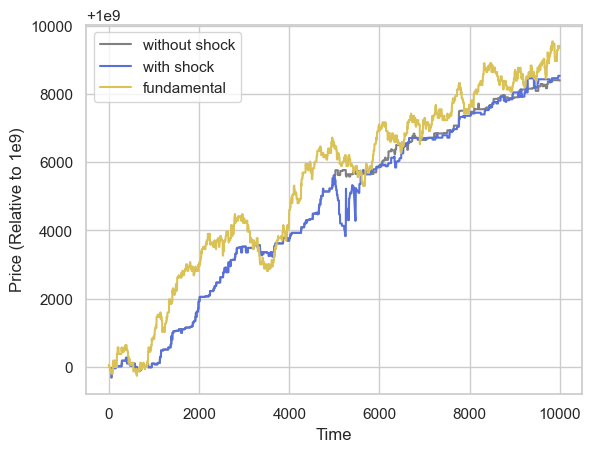

In [2]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.a/"

    # Show plot
    plt.savefig(base + f"6.1.a_{seed}_SELL.png")


Buy Side Shocks: 

AVG No shock surplus: 60.36626052856445
No shock surplusses:[tensor(60.3663)]
AVG Shock surplus: 260.1634521484375
Shock surplusses:[tensor(260.1635)]
AVG No shock surplus: 123.11963653564453
No shock surplusses:[tensor(123.1196)]
AVG Shock surplus: 1328.40234375
Shock surplusses:[tensor(1328.4023)]
AVG No shock surplus: 156.2361602783203
No shock surplusses:[tensor(156.2362)]
AVG Shock surplus: 855.5964965820312
Shock surplusses:[tensor(855.5965)]
AVG No shock surplus: 97.92120361328125
No shock surplusses:[tensor(97.9212)]
AVG Shock surplus: 2220.088623046875
Shock surplusses:[tensor(2220.0886)]
AVG No shock surplus: 126.490966796875
No shock surplusses:[tensor(126.4910)]
AVG Shock surplus: -976.5601196289062
Shock surplusses:[tensor(-976.5601)]
AVG No shock surplus: 135.2461700439453
No shock surplusses:[tensor(135.2462)]
AVG Shock surplus: 883.4124755859375
Shock surplusses:[tensor(883.4125)]
AVG No shock surplus: 41.85399627685547
No shock surplusses:[tensor(41.8540)]
AVG Shock su

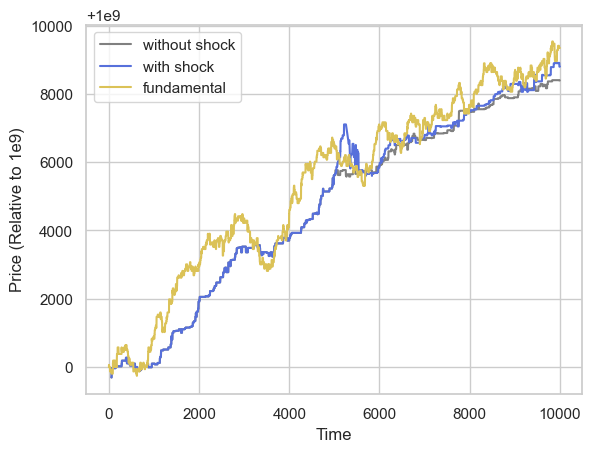

In [3]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.a/"

    # Show plot
    plt.savefig(base + f"6.1.a_{seed}_BUY.png")


Figure 6.1.b - Pg 62 top right

Notes: 
- same notes as for 6.1.a
- difference is that this graph enables ZI trader market observation 
- strategic_variance = 1e6, this is not explicitly defined in the thesis

Sell Side Shocks:

AVG No shock surplus: 125.55891418457031
No shock surplusses:[tensor(125.5589)]
AVG Shock surplus: 1564.4075927734375
Shock surplusses:[tensor(1564.4076)]
AVG No shock surplus: 200.66265869140625
No shock surplusses:[tensor(200.6627)]
AVG Shock surplus: -373.64532470703125
Shock surplusses:[tensor(-373.6453)]
AVG No shock surplus: 206.75677490234375
No shock surplusses:[tensor(206.7568)]
AVG Shock surplus: 1331.1630859375
Shock surplusses:[tensor(1331.1631)]
AVG No shock surplus: 162.5617218017578
No shock surplusses:[tensor(162.5617)]
AVG Shock surplus: -517.615234375
Shock surplusses:[tensor(-517.6152)]
AVG No shock surplus: 182.91021728515625
No shock surplusses:[tensor(182.9102)]
AVG Shock surplus: 3222.41357421875
Shock surplusses:[tensor(3222.4136)]
AVG No shock surplus: 183.006103515625
No shock surplusses:[tensor(183.0061)]
AVG Shock surplus: 1214.7183837890625
Shock surplusses:[tensor(1214.7184)]
AVG No shock surplus: 159.64649963378906
No shock surplusses:[tensor(159.6465)]
A

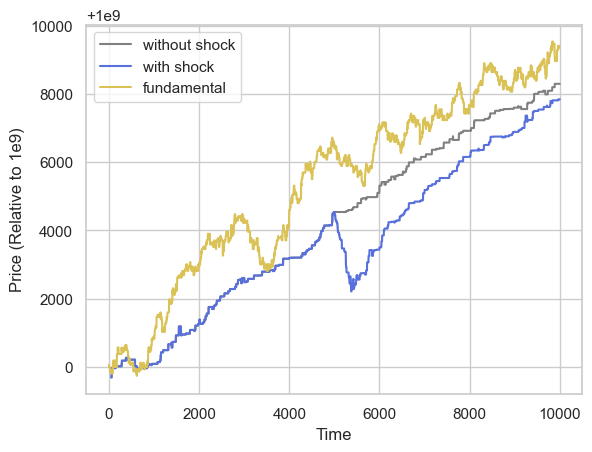

In [4]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.b/"

    # Show plot
    plt.savefig(base + f"6.1.b_{seed}_SELL.png")


Buy Side Shocks: 

AVG No shock surplus: 125.55891418457031
No shock surplusses:[tensor(125.5589)]
AVG Shock surplus: 747.2648315429688
Shock surplusses:[tensor(747.2648)]
AVG No shock surplus: 200.66265869140625
No shock surplusses:[tensor(200.6627)]
AVG Shock surplus: 2250.068359375
Shock surplusses:[tensor(2250.0684)]
AVG No shock surplus: 206.75677490234375
No shock surplusses:[tensor(206.7568)]
AVG Shock surplus: 823.798828125
Shock surplusses:[tensor(823.7988)]
AVG No shock surplus: 162.5617218017578
No shock surplusses:[tensor(162.5617)]
AVG Shock surplus: 3152.940185546875
Shock surplusses:[tensor(3152.9402)]
AVG No shock surplus: 182.91021728515625
No shock surplusses:[tensor(182.9102)]
AVG Shock surplus: -760.6995239257812
Shock surplusses:[tensor(-760.6995)]
AVG No shock surplus: 183.006103515625
No shock surplusses:[tensor(183.0061)]
AVG Shock surplus: 1258.6160888671875
Shock surplusses:[tensor(1258.6161)]
AVG No shock surplus: 159.64649963378906
No shock surplusses:[tensor(159.6465)]
AVG Sh

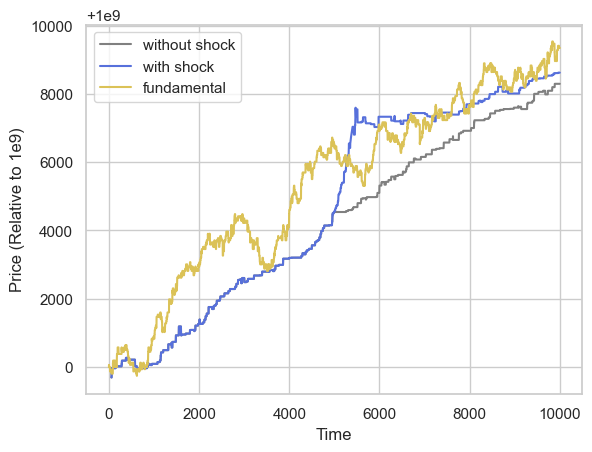

In [5]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.b/"

    # Show plot
    plt.savefig(base + f"6.1.b_{seed}_BUY.png")
